**NLP**



Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.

NLP is currently the focus of significant interest in the machine learning community. Some of the use cases for NLP are listed here:


* Chatbots
* Search(text and Audio)
* Text Classification
* Sentiment Analysis
* Recomendation System
* QnA
* Speech recognation
* NLU (Natural Language Understanding)
* NLG ( Natural Language Generation)



**NLP Techniques**



The most recent approach involves deep learning, whereby a neural network learns the features instead of relying on human to perform feature engineering. One of the key ideas involves mapping words to numbers, which enables us to map sentence to vector of number. After transforming documents to vector, we can perform a myriad of operations on those vector. For example we use the notion of vector space to define vector space model, where the distance between two vector can be measured by the angle between them (related to cosine similarity). If two vector are closed to each other, then it's likelier that the coresponding sentence are similar meaning. Their similarity is based on the distributional hypothesis, which asserts that words in the same contexts tent to have similar meaning.The NLP models that use deep learning can comprise **CNNs**, **RNNs**, **LSTMs**, and **bidirectional** LSTMs.

**In this problem statement we will see Sentiment Analysis**

**What is Sentiment Analysis ?**


***Sentiment Analysis [1]***: Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.

***Sentiment Analysis [2]***: Is the process of understanding if a given text is talking positively or negatively about a given subject, aiming for brand monitoring.

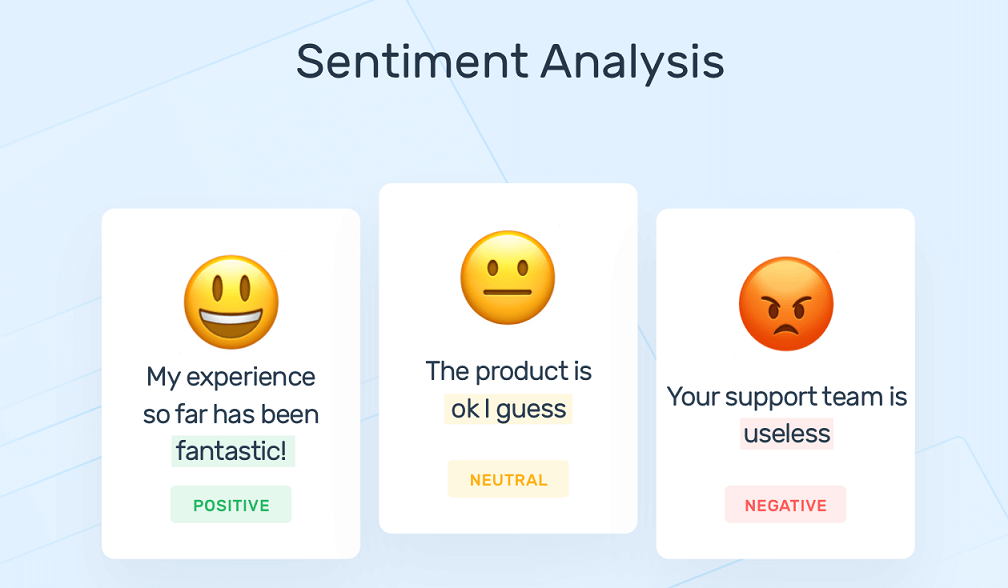

# Sentiment Analysis of Financial News Using NLTK

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/Headlines/guardian_headlines.csv.zip

Archive:  drive/MyDrive/Headlines/guardian_headlines.csv.zip
  inflating: guardian_headlines.csv  


In [3]:
!unzip drive/MyDrive/Headlines/reuters_headlines.csv.zip
#!unzip drive/MyDrive/Headlines/cnbc_headlines.csv

Archive:  drive/MyDrive/Headlines/reuters_headlines.csv.zip
  inflating: reuters_headlines.csv   


We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [4]:
# Import all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Basic EDA on cnbc_headlines dataset

In [5]:
# Read csv file of cnbc headlines using pandas
cnbc = pd.read_csv('/content/cnbc_headlines.csv')

In [6]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [7]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [8]:
# Check all the columns in the cnbc headline dataset
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [9]:
# Check which columns are having categorical, numerical or boolean values
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [10]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [11]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [12]:
# Reset index of the dataframe
cnbc.reset_index(inplace=True)

# Drop the extra 'index' column from dataframe
cnbc = cnbc.drop(['index'], axis=1)

In [13]:
cnbc.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [14]:
#checking duplicate records

dup_list = list(cnbc.duplicated(keep='first').values)
dup_list.count(True)

0

No duplicate records present in data

In [15]:
# drop the duplicate rows in the dataset keep the first one
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [16]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [17]:
# Read csv file of gaurdian headlines using pandas
gaurdian_data = pd.read_csv('/content/guardian_headlines.csv')

In [18]:
gaurdian_data.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [19]:
#check the shape of gaurdian headline dataset
gaurdian_data.shape

(17800, 2)

In [20]:
#check columns of gaurdian headline
gaurdian_data.columns

Index(['Time', 'Headlines'], dtype='object')

In [21]:
# Check which columns are having categorical, numerical or boolean values
gaurdian_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [22]:
# check null values in gaurdian headlines dataset
gaurdian_data.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [23]:
#checking for duplicates
dup_list = list(gaurdian_data.duplicated(keep='first').values)
dup_list.count(True)

0

No duplicates in garudian_data

In [24]:
# drop duplicate rows in headlines and keep the first one
gaurdian_data

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


# Basic EDA on reuters headlines

In [25]:
# Read csv file of reuters headlines using using pandas
reuters_data = pd.read_csv('/content/reuters_headlines.csv')

In [26]:
reuters_data

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [27]:
#check the shape of reuters headlines dataset
reuters_data.shape

(32770, 3)

In [28]:
#check the columns of reuters headline dataset
reuters_data.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [29]:
# Check which columns are having categorical, numerical or boolean values
reuters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [30]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_data.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [31]:
#checking for duplicates
dup_list = list(reuters_data.duplicated(keep='first').values)
dup_list.count(True)

55

In [32]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_data = reuters_data.drop_duplicates(keep='first')

#reset index
reuters_data.reset_index(inplace=True)

#drop extra index column
reuters_data = reuters_data.drop(['index'], axis=1)

In [33]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_data

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#Making some functions that we will need  ahead

Preprocessing 

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [34]:
from nltk.corpus.reader.ycoe import wordpunct_tokenize
# create a function for preprocessing 
def preprocessing_data(data):

  #convert all to lowercase
  data = data.lower()

  #remove puntuations
  data = data.translate(str.maketrans("","", string.punctuation))

  #remove stopword
  stop_word = set(stopwords)
  tokens =word_tokenize(data)
  word_tokens = [w for w in tokens if w not in stop_word ]

  #stemming
  stemmer = PorterStemmer()
  stem_word = [stemmer.stem(w) for w in word_tokens]


  #lemmitizing
  lemmer = WordNetLemmatizer()
  lem_word = [lemmer.lemmatize(w, pos='a') for w in stem_word]

  return " ".join(lem_word)


  

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [35]:
# import sentiment intensity analyzer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [94]:
#fuction to  decide sentiment as positive, negative and neutral
def mapper(data):
  if data == 0.0:
    return "Neutral"
  elif data < 0.0:
    return "Negative"
  else:
    return "Positive"



# Now working with description on datasets

In [97]:
# concatenate cnbc headlines dataset and reuters headline dataset
cnbc_reuters = pd.concat([cnbc, reuters_data], axis=0)


In [98]:
#check the shape of this new dataset
cnbc_reuters.shape


(35515, 3)

In [99]:
#make a copy of new dataset 

cnbc_reu = cnbc_reuters.copy()

In [100]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [101]:
# apply preprocessing to the description of new dataset

cnbc_reu['Description'] = cnbc_reu['Description'].apply(preprocessing_data)
cnbc_reu

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...


In [102]:
# analyze polarity score of values in description and  add new column of it in dataset

ds_score = []
for value in cnbc_reu['Description'].values:
  ds_score.append(SIA.polarity_scores(value)['compound'])

cnbc_reu['ds_score'] = ds_score
cnbc_reu

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [103]:
# apply the function  which decides sentiment to  polarity score column
cnbc_reu['ds_score'] = cnbc_reu['ds_score'].apply(mapper)
cnbc_reu

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32710,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32711,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32712,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32713,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


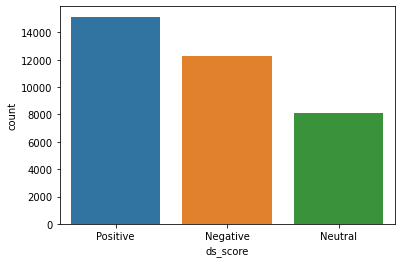

In [104]:
# plot a count plot on description score column
sns.countplot(x='ds_score', data=cnbc_reu);

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [45]:
# pie chart on description score column
import plotly.express as px
fig = px.pie(cnbc_reu, names='ds_score', title='Pie chart of different sentiments')
fig.show()

In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [46]:
#import machine learning libraries
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(cnbc_reu['Description'], cnbc_reu.ds_score,
                                                                test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [49]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                  ('model', LinearSVC())])


# Fit the pipeline to the data
linear_svc_model_ds = pipe.fit(x_train_ds, y_train_ds)
# predict on test dataset
prediction = linear_svc_model_ds.predict(x_test_ds)
print("MODEL - Linear SVC")

# print accuracy score
accuracy_lsvc_D = print('accuracy score: {}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

#print classification report
print(classification_report(y_test_ds, prediction))

MODEL - Linear SVC
accuracy score: 93.58%
[[1129   43   62]
 [  21  761   17]
 [  56   29 1434]]
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93      1234
      Nutral       0.91      0.95      0.93       799
    Positive       0.95      0.94      0.95      1519

    accuracy                           0.94      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.94      0.94      0.94      3552

CPU times: user 2.14 s, sys: 40.6 ms, total: 2.18 s
Wall time: 2.78 s


LOGISTIC REGRESSION


In [50]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression())])
# fit the pipeline to the train data
log_model_ds = pipe.fit(x_train_ds, y_train_ds)

# predict on test dataset
prediction = log_model_ds.predict(x_test_ds)
print("Model - Logistic Regression")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction)) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - Logistic Regression
accuracy: 89.89%
[[1060   76   98]
 [  35  735   29]
 [  72   49 1398]]
              precision    recall  f1-score   support

    Negative       0.91      0.86      0.88      1234
      Nutral       0.85      0.92      0.89       799
    Positive       0.92      0.92      0.92      1519

    accuracy                           0.90      3552
   macro avg       0.89      0.90      0.90      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: user 6.2 s, sys: 3.98 s, total: 10.2 s
Wall time: 5.87 s


MULTINOMIAL NAIVE BAYES


In [51]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])

# fit the pipeline to the train data
MultinomialNB_model_ds = pipe.fit(x_train_ds, y_train_ds)

#predict on test data
prediction = MultinomialNB_model_ds.predict(x_test_ds)
print("Model - MultinomialNB")

#print accuracy
accuracy_Multi_D = print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction))

Model - MultinomialNB
accuracy : 63.8%
[[ 793    8  433]
 [ 139   84  576]
 [ 126    4 1389]]
              precision    recall  f1-score   support

    Negative       0.75      0.64      0.69      1234
      Nutral       0.88      0.11      0.19       799
    Positive       0.58      0.91      0.71      1519

    accuracy                           0.64      3552
   macro avg       0.73      0.55      0.53      3552
weighted avg       0.70      0.64      0.59      3552

CPU times: user 993 ms, sys: 7.94 ms, total: 1 s
Wall time: 1 s


BERNOULLI NAIVE BAYES


In [52]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', BernoulliNB())])


# fit the pipeline to the train data
BernoulliNB_model_ds = pipe.fit(x_train_ds, y_train_ds)

#predict on test dataset
prediction = BernoulliNB_model_ds.predict(x_test_ds)
print("Bernoullis Naive Bayes")

#print accuracy
print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction))

Bernoullis Naive Bayes
accuracy : 73.62%
[[ 904   63  267]
 [ 136  475  188]
 [ 213   70 1236]]
              precision    recall  f1-score   support

    Negative       0.72      0.73      0.73      1234
      Nutral       0.78      0.59      0.68       799
    Positive       0.73      0.81      0.77      1519

    accuracy                           0.74      3552
   macro avg       0.74      0.71      0.72      3552
weighted avg       0.74      0.74      0.73      3552

CPU times: user 1.08 s, sys: 14.2 ms, total: 1.1 s
Wall time: 1.11 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [53]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', GradientBoostingClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=55))])

# Fit the pipeline to the data
GB_model_ds = pipe.fit(x_train_ds, y_train_ds)

# predict on test data
prediction = GB_model_ds.predict(x_test_ds)
print("Gradient Boost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))


# print classification report
print(classification_report(y_test_ds, prediction))

Gradient Boost
accuracy : 42.88%
[[   5    0 1229]
 [   0    0  799]
 [   1    0 1518]]
              precision    recall  f1-score   support

    Negative       0.83      0.00      0.01      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.43      1.00      0.60      1519

    accuracy                           0.43      3552
   macro avg       0.42      0.33      0.20      3552
weighted avg       0.47      0.43      0.26      3552

CPU times: user 19.1 s, sys: 48.4 ms, total: 19.1 s
Wall time: 23.1 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [54]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', XGBClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=2020))])

# Fit the pipeline to the data
XGB_model_ds = pipe.fit(x_train_ds, y_train_ds)

# predict on test data
prediction = XGB_model_ds.predict(x_test_ds)
print("XGBoost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction))

XGBoost
accuracy : 50.73%
[[ 324    0  910]
 [   3    0  796]
 [  41    0 1478]]
              precision    recall  f1-score   support

    Negative       0.88      0.26      0.40      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.46      0.97      0.63      1519

    accuracy                           0.51      3552
   macro avg       0.45      0.41      0.34      3552
weighted avg       0.50      0.51      0.41      3552

CPU times: user 6.51 s, sys: 55.3 ms, total: 6.57 s
Wall time: 6.62 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DECISION TREE CLASSIFICATION MODEL


In [55]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', DecisionTreeClassifier(criterion='entropy',
                                                       splitter='best',
                                                       max_depth=10,
                                                       random_state=2020))])


# Fit the pipeline to the data
DT_model_ds = pipe.fit(x_train_ds, y_train_ds)

# predict on test data
prediction = DT_model_ds.predict(x_test_ds)
print("Decision Tree Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction))

Decision Tree Classifier
accuracy : 50.2%
[[1094    1  139]
 [ 797    0    2]
 [ 829    1  689]]
              precision    recall  f1-score   support

    Negative       0.40      0.89      0.55      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.83      0.45      0.59      1519

    accuracy                           0.50      3552
   macro avg       0.41      0.45      0.38      3552
weighted avg       0.49      0.50      0.44      3552

CPU times: user 4.05 s, sys: 23 ms, total: 4.08 s
Wall time: 4.93 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [56]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', KNeighborsClassifier(n_neighbors=10,
                                                       weights='distance',
                                                       algorithm='brute'
                                                       ))])


# Fit the pipeline to the data
KNN_model_ds = pipe.fit(x_train_ds, y_train_ds)

# predict on test data
prediction = KNN_model_ds.predict(x_test_ds)
print("KNeighbors Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_ds, prediction))

# print classification report
print(classification_report(y_test_ds, prediction))

KNeighbors Classifier
accuracy : 58.22%
[[ 735  146  353]
 [ 183  270  346]
 [ 271  185 1063]]
              precision    recall  f1-score   support

    Negative       0.62      0.60      0.61      1234
      Nutral       0.45      0.34      0.39       799
    Positive       0.60      0.70      0.65      1519

    accuracy                           0.58      3552
   macro avg       0.56      0.54      0.55      3552
weighted avg       0.57      0.58      0.57      3552

CPU times: user 4.32 s, sys: 1.26 s, total: 5.59 s
Wall time: 5.57 s


In [57]:
# helper function for comparing models matric
def compare_models(models, names,x_train_ds,y_train_ds,x_test_ds,y_test_ds):

    # the libraries we need
  import sklearn.metrics as metrics
    # create a dataframe with column matric and metric name as value
  for(model, name) in zip(models,names):
    print(name)
    y_pred = model.predict(x_test_ds) 
   
    # then predict on the test set
    res = classification_report(y_test_ds, y_pred)
    print("Classification report \n", res)
    print("------------"*5)

In [58]:
# list of model objects
models=[linear_svc_model_ds,log_model_ds,MultinomialNB_model_ds,BernoulliNB_model_ds,GB_model_ds,XGB_model_ds,DT_model_ds,KNN_model_ds]

# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientboost','xgboost','decisiontree','KNN']

# print the comparison of models
compare_models(models, names,x_train_ds,y_train_ds,x_test_ds,y_test_ds)

linearSVC
Classification report 
               precision    recall  f1-score   support

    Negative       0.94      0.91      0.93      1234
      Nutral       0.91      0.95      0.93       799
    Positive       0.95      0.94      0.95      1519

    accuracy                           0.94      3552
   macro avg       0.93      0.94      0.93      3552
weighted avg       0.94      0.94      0.94      3552

------------------------------------------------------------
logistic
Classification report 
               precision    recall  f1-score   support

    Negative       0.91      0.86      0.88      1234
      Nutral       0.85      0.92      0.89       799
    Positive       0.92      0.92      0.92      1519

    accuracy                           0.90      3552
   macro avg       0.89      0.90      0.90      3552
weighted avg       0.90      0.90      0.90      3552

------------------------------------------------------------
MultinomialNB
Classification report 
            

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report 
               precision    recall  f1-score   support

    Negative       0.83      0.00      0.01      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.43      1.00      0.60      1519

    accuracy                           0.43      3552
   macro avg       0.42      0.33      0.20      3552
weighted avg       0.47      0.43      0.26      3552

------------------------------------------------------------
xgboost


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report 
               precision    recall  f1-score   support

    Negative       0.88      0.26      0.40      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.46      0.97      0.63      1519

    accuracy                           0.51      3552
   macro avg       0.45      0.41      0.34      3552
weighted avg       0.50      0.51      0.41      3552

------------------------------------------------------------
decisiontree
Classification report 
               precision    recall  f1-score   support

    Negative       0.40      0.89      0.55      1234
      Nutral       0.00      0.00      0.00       799
    Positive       0.83      0.45      0.59      1519

    accuracy                           0.50      3552
   macro avg       0.41      0.45      0.38      3552
weighted avg       0.49      0.50      0.44      3552

------------------------------------------------------------
KNN
Classification report 
               precision    

# working with test dataset

In [105]:
# Perforn the prediction on the test dataset
y_prediction = linear_svc_model_ds.predict(x_test_ds)
y_prediction

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [106]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_prediction)

In [61]:
predictions.head()

,0
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative


# Now working with headlines + description

In [107]:
cnbc_reu.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative


In [108]:
# merge headlines and description of new dataset and name it info
cnbc_reu['info'] = cnbc_reu['Headlines'] + cnbc_reu['Description']
cnbc_reu.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [109]:
# only keep info and time column . drop all remaining columns
cnbc_reu = cnbc_reu.drop(['Headlines','Description','ds_score'], axis=1)
cnbc_reu.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [110]:
# apply preprocessing on info column
cnbc_reu['info'] = cnbc_reu['info'].apply(preprocessing_data)
cnbc_reu.head(20)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wexmad mon...
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...


In [111]:
# analyze polarity score of values in info and  add new column of it in dataset
info_score = []

for value in cnbc_reu['info'].values:
  info_score.append(SIA.polarity_scores(value)['compound'])

cnbc_reu['info_score'] = info_score
cnbc_reu

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32712,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [112]:
# apply the function  which decides sentiment to  polarity score column
cnbc_reu['info_score'] = cnbc_reu['info_score'].apply(mapper)
cnbc_reu

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32712,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


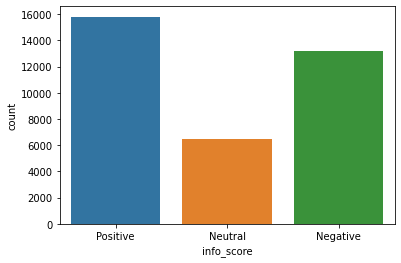

In [113]:
# perform count plot on info_score column
sns.countplot(x='info_score', data=cnbc_reu);

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [69]:
# perform pie chart on info_score column
fig = px.pie(cnbc_reu, names='info_score', title='Pie chart of different sentiments')
fig.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [114]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212
x_train_hl_ds, x_test_hl_ds, y_train_hl_ds, y_test_hl_ds = train_test_split(cnbc_reu['info'], cnbc_reu.info_score,
                                                                test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [71]:

%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                  ('model', LinearSVC())])

# Fit the pipline to the data
linear_svc_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

#predict on test dataset
prediction = linear_svc_model_hl_ds.predict(x_test_hl_ds)
print("MODEL - Linear SVC")

#print accuracy
accuracy_lsvc_D = print('accuracy score: {}%'.format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))

MODEL - Linear SVC
accuracy score: 90.6%
[[1192   39   85]
 [  38  547   49]
 [  75   48 1479]]
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      1316
      Nutral       0.86      0.86      0.86       634
    Positive       0.92      0.92      0.92      1602

    accuracy                           0.91      3552
   macro avg       0.90      0.90      0.90      3552
weighted avg       0.91      0.91      0.91      3552

CPU times: user 2.57 s, sys: 77.3 ms, total: 2.64 s
Wall time: 2.64 s


LOGISTIC REGRESSION


In [72]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression())])
# fit the pipeline to the train data
log_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test dataset
prediction = log_model_hl_ds.predict(x_test_hl_ds)
print("Model - Logistic Regression")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction)) 


 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - Logistic Regression
accuracy: 86.68%
[[1142   54  120]
 [  79  473   82]
 [  89   49 1464]]
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      1316
      Nutral       0.82      0.75      0.78       634
    Positive       0.88      0.91      0.90      1602

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 9.42 s, sys: 5.79 s, total: 15.2 s
Wall time: 8.84 s


MULTINOMIAL NAIVE BAYES


In [73]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])
# fit the pipeline to the train data
MultinomialNB_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test dataset
prediction = MultinomialNB_model_hl_ds.predict(x_test_hl_ds)
print("Model - Multinomial Naive Bayes")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))


 

Model - Multinomial Naive Bayes
accuracy: 64.41%
[[ 827    0  489]
 [ 131   12  491]
 [ 151    2 1449]]
              precision    recall  f1-score   support

    Negative       0.75      0.63      0.68      1316
      Nutral       0.86      0.02      0.04       634
    Positive       0.60      0.90      0.72      1602

    accuracy                           0.64      3552
   macro avg       0.73      0.52      0.48      3552
weighted avg       0.70      0.64      0.58      3552

CPU times: user 1.41 s, sys: 71.2 ms, total: 1.48 s
Wall time: 1.48 s


BERNOULLI NAIVE BAYES


In [74]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', BernoulliNB())])
# fit the pipeline to the train data
BernoulliNB_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test dataset
prediction = BernoulliNB_model_hl_ds.predict(x_test_hl_ds)
print("Model - BernoulliNB Naive Bayes")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))
 

Model - BernoulliNB Naive Bayes
accuracy: 68.58%
[[ 964   14  338]
 [ 172  148  314]
 [ 258   20 1324]]
              precision    recall  f1-score   support

    Negative       0.69      0.73      0.71      1316
      Nutral       0.81      0.23      0.36       634
    Positive       0.67      0.83      0.74      1602

    accuracy                           0.69      3552
   macro avg       0.72      0.60      0.60      3552
weighted avg       0.70      0.69      0.66      3552

CPU times: user 1.36 s, sys: 55.7 ms, total: 1.41 s
Wall time: 1.41 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [75]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', GradientBoostingClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=55))])

# Fit the pipeline to the data
GB_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test data
prediction = GB_model_hl_ds.predict(x_test_hl_ds)
print("Gradient Boost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))


# print classification report
print(classification_report(y_test_hl_ds, prediction))
 

Gradient Boost
accuracy : 45.33%
[[  12    0 1304]
 [   0    0  634]
 [   4    0 1598]]
              precision    recall  f1-score   support

    Negative       0.75      0.01      0.02      1316
      Nutral       0.00      0.00      0.00       634
    Positive       0.45      1.00      0.62      1602

    accuracy                           0.45      3552
   macro avg       0.40      0.34      0.21      3552
weighted avg       0.48      0.45      0.29      3552

CPU times: user 19.9 s, sys: 431 ms, total: 20.3 s
Wall time: 20.3 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [76]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', XGBClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=2020))])

# Fit the pipeline to the data
XGB_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test data
prediction = XGB_model_hl_ds.predict(x_test_hl_ds)
print("XGBoost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))


XGBoost
accuracy : 52.76%
[[ 318    0  998]
 [   2    0  632]
 [  45    1 1556]]
              precision    recall  f1-score   support

    Negative       0.87      0.24      0.38      1316
      Nutral       0.00      0.00      0.00       634
    Positive       0.49      0.97      0.65      1602

    accuracy                           0.53      3552
   macro avg       0.45      0.40      0.34      3552
weighted avg       0.54      0.53      0.43      3552

CPU times: user 10.6 s, sys: 67.7 ms, total: 10.7 s
Wall time: 10.8 s


DECISION TREE CLASSIFICATION MODEL


In [77]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', DecisionTreeClassifier(criterion='entropy',
                                                       splitter='best',
                                                       max_depth=10,
                                                       random_state=2020))])


# Fit the pipeline to the data
DT_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test data
prediction = DT_model_hl_ds.predict(x_test_hl_ds)
print("Decision Tree Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))



Decision Tree Classifier
accuracy : 52.31%
[[1160    0  156]
 [ 632    0    2]
 [ 902    2  698]]
              precision    recall  f1-score   support

    Negative       0.43      0.88      0.58      1316
      Nutral       0.00      0.00      0.00       634
    Positive       0.82      0.44      0.57      1602

    accuracy                           0.52      3552
   macro avg       0.42      0.44      0.38      3552
weighted avg       0.53      0.52      0.47      3552

CPU times: user 4.29 s, sys: 35.8 ms, total: 4.33 s
Wall time: 4.34 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [78]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', KNeighborsClassifier(n_neighbors=10,
                                                       weights='distance',
                                                       algorithm='brute'
                                                       ))])


# Fit the pipeline to the data
KNN_model_hl_ds = pipe.fit(x_train_hl_ds, y_train_hl_ds)

# predict on test data
prediction = KNN_model_hl_ds.predict(x_test_hl_ds)
print("KNeighbors Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(y_test_hl_ds, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(y_test_hl_ds, prediction))

# print classification report
print(classification_report(y_test_hl_ds, prediction))


KNeighbors Classifier
accuracy : 59.43%
[[ 816   92  408]
 [ 154  171  309]
 [ 350  128 1124]]
              precision    recall  f1-score   support

    Negative       0.62      0.62      0.62      1316
      Nutral       0.44      0.27      0.33       634
    Positive       0.61      0.70      0.65      1602

    accuracy                           0.59      3552
   macro avg       0.56      0.53      0.54      3552
weighted avg       0.58      0.59      0.58      3552

CPU times: user 5.07 s, sys: 110 ms, total: 5.18 s
Wall time: 5.17 s


In [79]:
# helper function for comparing models matric
def compare_models(models, names,x_train_hl_ds,y_train_hl_ds,x_test_hl_ds,y_test_hl_ds):

    # the libraries we need
  import sklearn.metrics as metrics
    # create a dataframe with column matric and metric name as value
  for(model, name) in zip(models,names):
    print(name)
    y_pred = model.predict(x_test_hl_ds) 
   
    # then predict on the test set
    res = classification_report(y_test_hl_ds, y_pred)
    print("Classification report \n", res)
    print("------------"*5)
   
   
    

In [80]:
# list of model objects
models=[linear_svc_model_hl_ds,log_model_hl_ds,MultinomialNB_model_hl_ds,BernoulliNB_model_hl_ds,GB_model_hl_ds,
        XGB_model_hl_ds,DT_model_hl_ds,KNN_model_hl_ds]

# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientboost','xgboost','decisiontree','KNN']

# print the comparison of models
compare_models(models, names,x_train_hl_ds,y_train_hl_ds,x_test_hl_ds,y_test_hl_ds)


linearSVC
Classification report 
               precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      1316
      Nutral       0.86      0.86      0.86       634
    Positive       0.92      0.92      0.92      1602

    accuracy                           0.91      3552
   macro avg       0.90      0.90      0.90      3552
weighted avg       0.91      0.91      0.91      3552

------------------------------------------------------------
logistic
Classification report 
               precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      1316
      Nutral       0.82      0.75      0.78       634
    Positive       0.88      0.91      0.90      1602

    accuracy                           0.87      3552
   macro avg       0.86      0.84      0.85      3552
weighted avg       0.87      0.87      0.87      3552

------------------------------------------------------------
MultinomialNB
Classification report 
            

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report 
               precision    recall  f1-score   support

    Negative       0.75      0.01      0.02      1316
      Nutral       0.00      0.00      0.00       634
    Positive       0.45      1.00      0.62      1602

    accuracy                           0.45      3552
   macro avg       0.40      0.34      0.21      3552
weighted avg       0.48      0.45      0.29      3552

------------------------------------------------------------
xgboost
Classification report 
               precision    recall  f1-score   support

    Negative       0.87      0.24      0.38      1316
      Nutral       0.00      0.00      0.00       634
    Positive       0.49      0.97      0.65      1602

    accuracy                           0.53      3552
   macro avg       0.45      0.40      0.34      3552
weighted avg       0.54      0.53      0.43      3552

------------------------------------------------------------
decisiontree
Classification report 
               precision

# working with test data

In [115]:
# Perforn the prediction on the test dataset
y_prediction = linear_svc_model_hl_ds.predict(x_test_hl_ds)
y_prediction

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [116]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_prediction)

In [117]:
predictions.head()

,0
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative


# now working on headlines

In [118]:
cnbc_reuters.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [119]:
# from the dataset you have copied before delete the column of description
cnbc_reuters = cnbc_reuters.drop('Description', axis=1)
cnbc_reuters.head()

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [120]:
gaurdian_data.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [121]:
# remane the date column in gaurdian headlines dataset  to time
gaurdian_data = gaurdian_data.rename(columns={'Date':'Time'})
gaurdian_data.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [122]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
all_headlines = pd.concat([gaurdian_data, cnbc_reuters], axis=0)

In [123]:
all_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [124]:
# check the shape of all headlines dataset
all_headlines.shape

(53315, 2)

In [125]:
#apply preprocessin to the headlines column in the new dataset
all_headlines['Headlines'] = all_headlines['Headlines'].apply(preprocessing_data)
all_headlines.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [126]:
# analyze polarity score of values in headlines and  add new column of it in dataset
hl_score = []
for value in all_headlines['Headlines'].values:
  hl_score.append(SIA.polarity_scores(value)['compound'])

all_headlines['hl_score'] = hl_score
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32712,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [127]:
# apply the function  which decides sentiment to  polarity score column
all_headlines['hl_score'] = all_headlines['hl_score'].apply(mapper)
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32710,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32711,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32712,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32713,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


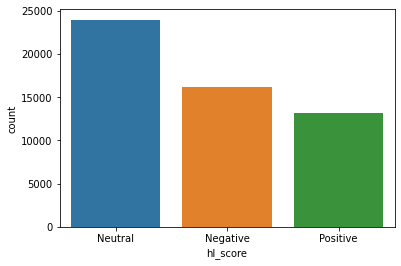

In [128]:
#perform countplot on headline score column
sns.countplot(x='hl_score', data=all_headlines);


In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [129]:
#perform pie digram on headline score column
fig = px.pie(all_headlines, names='hl_score', title='Pie chart of different sentiments')
fig.show()


In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [131]:
# split the dataset  into test and train 
# 90% train , 10% test and random state 212

train_x_hl, test_x_hl, train_y_hl, test_y_hl = train_test_split(all_headlines['Headlines'], all_headlines.hl_score,
                                                                test_size=0.1, random_state=212)


LINEAR SUPPORT VECTOR MACHINE

In [132]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


pipe = Pipeline([('tfidf', TfidfVectorizer()),
                  ('model', LinearSVC())])

# Fit the pipline to the data
linear_svc_model_hl = pipe.fit(train_x_hl, train_y_hl)

#predict on test dataset
prediction = linear_svc_model_hl.predict(test_x_hl)
print("MODEL - Linear SVC")

#print accuracy
accuracy_lsvc_D = print('accuracy score: {}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))


MODEL - Linear SVC
accuracy score: 97.22%
[[1516   29   45]
 [   9 2340    6]
 [  38   21 1328]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1590
     Neutral       0.98      0.99      0.99      2355
    Positive       0.96      0.96      0.96      1387

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

CPU times: user 2.82 s, sys: 139 ms, total: 2.96 s
Wall time: 5.3 s


LOGISTIC REGRESSION

In [133]:
%%time
# pipeline creation 
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', LogisticRegression())])
# fit the pipeline to the train data
log_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test dataset
prediction = log_model_hl.predict(test_x_hl)
print("Model - Logistic Regression")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - Logistic Regression
accuracy: 93.59%
[[1420  112   58]
 [  12 2340    3]
 [  52  105 1230]]
              precision    recall  f1-score   support

    Negative       0.96      0.89      0.92      1590
     Neutral       0.92      0.99      0.95      2355
    Positive       0.95      0.89      0.92      1387

    accuracy                           0.94      5332
   macro avg       0.94      0.92      0.93      5332
weighted avg       0.94      0.94      0.94      5332

CPU times: user 6.56 s, sys: 8.56 s, total: 15.1 s
Wall time: 9.18 s


MULTINOMIAL NAIVE BAYES


In [134]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', MultinomialNB())])
# fit the pipeline to the train data
MultinomialNB_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test dataset
prediction = MultinomialNB_model_hl.predict(test_x_hl)
print("Model - Multinomial Naive Bayes")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))


Model - Multinomial Naive Bayes
accuracy: 84.21%
[[1342  189   59]
 [  61 2269   25]
 [ 202  306  879]]
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84      1590
     Neutral       0.82      0.96      0.89      2355
    Positive       0.91      0.63      0.75      1387

    accuracy                           0.84      5332
   macro avg       0.86      0.81      0.82      5332
weighted avg       0.85      0.84      0.84      5332

CPU times: user 882 ms, sys: 27.9 ms, total: 910 ms
Wall time: 912 ms


BERNOULLI NAIVE BAYES


In [135]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', BernoulliNB())])
# fit the pipeline to the train data
BernoulliNB_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test dataset
prediction = BernoulliNB_model_hl.predict(test_x_hl)
print("Model - BernoulliNB Naive Bayes")

#print accuracy
accuracy_log_D = print("accuracy: {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))




Model - BernoulliNB Naive Bayes
accuracy: 88.8%
[[1426   58  106]
 [ 123 2160   72]
 [ 179   59 1149]]
              precision    recall  f1-score   support

    Negative       0.83      0.90      0.86      1590
     Neutral       0.95      0.92      0.93      2355
    Positive       0.87      0.83      0.85      1387

    accuracy                           0.89      5332
   macro avg       0.88      0.88      0.88      5332
weighted avg       0.89      0.89      0.89      5332

CPU times: user 881 ms, sys: 64.3 ms, total: 946 ms
Wall time: 946 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [136]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', GradientBoostingClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=55))])

# Fit the pipeline to the data
GB_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test data
prediction = GB_model_hl.predict(test_x_hl)
print("Gradient Boost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))


# print classification report
print(classification_report(test_y_hl, prediction))





Gradient Boost
accuracy : 44.17%
[[   0 1590    0]
 [   0 2355    0]
 [   0 1387    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1590
     Neutral       0.44      1.00      0.61      2355
    Positive       0.00      0.00      0.00      1387

    accuracy                           0.44      5332
   macro avg       0.15      0.33      0.20      5332
weighted avg       0.20      0.44      0.27      5332

CPU times: user 8.93 s, sys: 1.29 s, total: 10.2 s
Wall time: 10.2 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [138]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', XGBClassifier(loss='deviance',
                                                       learning_rate=0.01,
                                                       n_estimators=10,
                                                       max_depth=5,
                                                       random_state=2020))])

# Fit the pipeline to the data
XGB_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test data
prediction = XGB_model_hl.predict(test_x_hl)
print("XGBoost")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

#print classification report
print(classification_report(test_y_hl, prediction))


XGBoost
accuracy : 59.17%
[[ 421 1118   51]
 [   0 2352    3]
 [  53  952  382]]
              precision    recall  f1-score   support

    Negative       0.89      0.26      0.41      1590
     Neutral       0.53      1.00      0.69      2355
    Positive       0.88      0.28      0.42      1387

    accuracy                           0.59      5332
   macro avg       0.77      0.51      0.51      5332
weighted avg       0.73      0.59      0.54      5332

CPU times: user 5.23 s, sys: 55.1 ms, total: 5.29 s
Wall time: 5.54 s


DECISION TREE CLASSIFICATION MODEL


In [139]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', DecisionTreeClassifier(criterion='entropy',
                                                       splitter='best',
                                                       max_depth=10,
                                                       random_state=2020))])


# Fit the pipeline to the data
DT_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test data
prediction = DT_model_hl.predict(test_x_hl)
print("Decision Tree Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))



Decision Tree Classifier
accuracy : 59.04%
[[ 395 1143   52]
 [   0 2354    1]
 [  36  952  399]]
              precision    recall  f1-score   support

    Negative       0.92      0.25      0.39      1590
     Neutral       0.53      1.00      0.69      2355
    Positive       0.88      0.29      0.43      1387

    accuracy                           0.59      5332
   macro avg       0.78      0.51      0.51      5332
weighted avg       0.74      0.59      0.54      5332

CPU times: user 2.18 s, sys: 16.4 ms, total: 2.2 s
Wall time: 2.2 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [140]:
%%time
# pipeline creation 
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                  ('model', KNeighborsClassifier(n_neighbors=10,
                                                       weights='distance',
                                                       algorithm='brute'
                                                       ))])


# Fit the pipeline to the data
KNN_model_hl = pipe.fit(train_x_hl, train_y_hl)

# predict on test data
prediction = KNN_model_hl.predict(test_x_hl)
print("KNeighbors Classifier")

#print accuracy
accuracy = print("accuracy : {}%".format(round(accuracy_score(test_y_hl, prediction)*100,2)))

#print confusion matrix
print(confusion_matrix(test_y_hl, prediction))

# print classification report
print(classification_report(test_y_hl, prediction))


KNeighbors Classifier
accuracy : 64.2%
[[ 871  599  120]
 [ 278 1912  165]
 [ 179  568  640]]
              precision    recall  f1-score   support

    Negative       0.66      0.55      0.60      1590
     Neutral       0.62      0.81      0.70      2355
    Positive       0.69      0.46      0.55      1387

    accuracy                           0.64      5332
   macro avg       0.66      0.61      0.62      5332
weighted avg       0.65      0.64      0.63      5332

CPU times: user 5.85 s, sys: 2.72 s, total: 8.57 s
Wall time: 9.76 s


In [141]:
# helper function for comparing models matric
def compare_models(models, names,train_x_hl,train_y_hl,test_x_hl,test_y_hl):

    # the libraries we need
  import sklearn.metrics as metrics
    # create a dataframe with column matric and metric name as value
  for(model, name) in zip(models,names):
    print(name)
    y_pred = model.predict(test_x_hl) 
   
    # then predict on the test set
    res = classification_report(test_y_hl, y_pred)
    print("Classification report \n", res)
    print("------------"*5)
   

In [142]:
# list of model objects

models=[linear_svc_model_hl,log_model_hl,MultinomialNB_model_hl,BernoulliNB_model_hl,GB_model_hl,
        XGB_model_hl,DT_model_hl,KNN_model_hl]

# list of model names
names = ['linearSVC','logistic','MultinomialNB','BernoulliNB','gradientboost','xgboost','decisiontree','KNN']

# print the comparison of models
compare_models(models, names,train_x_hl,train_y_hl,test_x_hl,test_y_hl)


linearSVC
Classification report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1590
     Neutral       0.98      0.99      0.99      2355
    Positive       0.96      0.96      0.96      1387

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

------------------------------------------------------------
logistic
Classification report 
               precision    recall  f1-score   support

    Negative       0.96      0.89      0.92      1590
     Neutral       0.92      0.99      0.95      2355
    Positive       0.95      0.89      0.92      1387

    accuracy                           0.94      5332
   macro avg       0.94      0.92      0.93      5332
weighted avg       0.94      0.94      0.94      5332

------------------------------------------------------------
MultinomialNB
Classification report 
            

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1590
     Neutral       0.44      1.00      0.61      2355
    Positive       0.00      0.00      0.00      1387

    accuracy                           0.44      5332
   macro avg       0.15      0.33      0.20      5332
weighted avg       0.20      0.44      0.27      5332

------------------------------------------------------------
xgboost
Classification report 
               precision    recall  f1-score   support

    Negative       0.89      0.26      0.41      1590
     Neutral       0.53      1.00      0.69      2355
    Positive       0.88      0.28      0.42      1387

    accuracy                           0.59      5332
   macro avg       0.77      0.51      0.51      5332
weighted avg       0.73      0.59      0.54      5332

------------------------------------------------------------
decisiontree
Classification report 
               precision

# now working with test data

In [143]:
# Perforn the prediction on the test dataset
y_prediction = linear_svc_model_hl.predict(test_x_hl)
y_prediction

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [144]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(y_prediction)

In [145]:
predictions

,0
0,Positive
1,Positive
2,Negative
3,Neutral
4,Negative
...,...
5327,Neutral
5328,Negative
5329,Positive
5330,Neutral


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more 

In [146]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [147]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Positive'], dtype=object)